In [18]:
import numpy as np
from matplotlib import pyplot as plt
import math
%matplotlib notebook


In [19]:
# read plane parameters and laser points
result_file = open('../calib_result.txt')
raw_data = result_file.readlines()
plane_params = np.fromstring(raw_data[1].strip(), dtype=float, sep=',')
pts = np.zeros((len(raw_data) - 3, 3))
for i in range(len(raw_data) - 3):
    pts[i] = np.fromstring(raw_data[i + 3].strip(), dtype=float, sep=',')


In [32]:
# generate plane
min_x = np.min(pts[:, 0])
max_x = np.max(pts[:, 0])
min_y = np.min(pts[:, 1])
max_y = np.max(pts[:, 1])
min_z = np.min(pts[:, 2])
max_z = np.max(pts[:, 2])
pl_xx, pl_yy = np.meshgrid(np.linspace(min_x - 0.1, max_x + 0.1),
                           np.linspace(min_y - 0.1, max_y + 0.1))
pl_z = (-plane_params[0] * pl_xx - plane_params[1] * pl_yy - plane_params[3]) / plane_params[2]

<IPython.core.display.Javascript object>


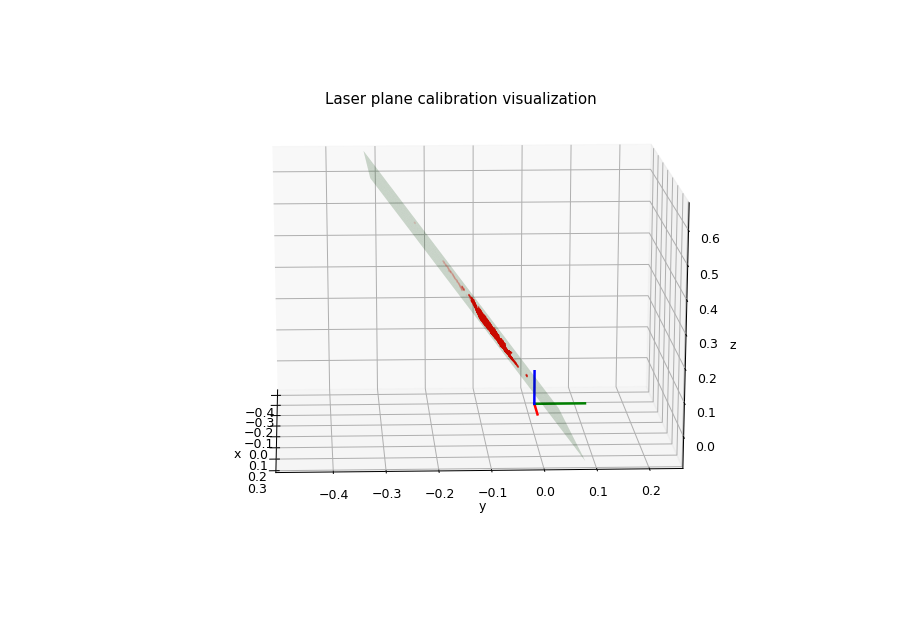

In [36]:
# plot points and plane
# todo draw camera axes?
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(pl_xx, pl_yy, pl_z, alpha=0.2, color='green')
ax.scatter(pts[:,0], pts[:,1], pts[:,2], s=0.25, alpha=0.1, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Laser plane calibration visualization')

#code to have equal axis
max_range = np.array([max_x-min_x, max_y - min_y, max_z - min_z]).max() / 2.0 + 0.1
mid_x = (max_x+min_x) * 0.5
mid_y = (max_y+min_y) * 0.5
mid_z = (max_z+min_z) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# draw axes
axes_len = 0.1
ax.plot([0, axes_len], [0, 0], [0, 0], color='red', linewidth=2)
ax.plot([0, 0], [0, axes_len], [0, 0], color='green', linewidth=2)
ax.plot([0, 0], [0, 0], [0, axes_len], color='blue', linewidth=2)

plt.show()